In [18]:
# 1 라이브러리 임포트

import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn as sk

# 알고리즘을 그래픽화 하기위한 라이브러리
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import rcParams
import re
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Rescaling
import keras

# 모델생성 라이브러리
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 데이터 스플릿,스케일링
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [19]:
# 1 데이터 불러오기 
path = "../Playground Series Season 3, Episode 3/playground-series-s3e3/"

train_csv = pd.read_csv(path+"train.csv")
test_csv = pd.read_csv(path+"test.csv")

In [20]:
# 2. 데이터 조회해보기
# y 값은 Attriton 이고 바이너리 
train_csv.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [21]:
# 3. 데이터 의 문자열 값 조회
print(np.unique(train_csv.BusinessTravel,return_counts=1),"\n",
np.unique(train_csv.Department,return_counts=1),"\n",
np.unique(train_csv.EducationField,return_counts=1))


(array(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype=object), array([ 126,  261, 1290], dtype=int64)) 
 (array(['Human Resources', 'Research & Development', 'Sales'], dtype=object), array([  39, 1167,  471], dtype=int64)) 
 (array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
       'Other', 'Technical Degree'], dtype=object), array([ 13, 775, 152, 549,  82, 106], dtype=int64))


In [22]:
# 4. 데이터의 결측치 확인
train_csv.isna().sum()

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [23]:
# 학습데이터의 고유값 조회
train_csv.nunique()

id                          1677
Age                           43
BusinessTravel                 3
DailyRate                    625
Department                     3
DistanceFromHome              29
Education                      6
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       6
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome                895
MonthlyRate                  903
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             41
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

In [24]:
# 값이 1개인 칼럼만을 조회
train_csv.nunique()[train_csv.nunique() == 1]

EmployeeCount    1
Over18           1
StandardHours    1
dtype: int64

In [25]:
# 값이 1개인 칼럼 삭제
train_csv.drop(["EmployeeCount", "Over18", "StandardHours","id"], axis=1, inplace=True)
test_csv.drop(["EmployeeCount", "Over18", "StandardHours","id"], axis=1, inplace=True)

In [26]:
train_csv = pd.get_dummies(train_csv)
test_csv = pd.get_dummies(test_csv)

In [27]:
# train 의 칼럼이 56개로 늘어남 ㄷㄷ
print(train_csv.shape,test_csv.shape)

(1677, 52) (1119, 51)


In [28]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
y = train_csv.Attrition
df = train_csv.drop(["Attrition"],axis=1)
df[df.columns] = scaler.fit_transform(df[df.columns])

In [29]:
train_df = df.iloc[:-len(test_csv),:]
train_df['Attrition'] = y[:-len(test_csv)]
test_df = df.iloc[-len(test_csv):,:].reset_index(drop=True)

x = train_df.drop('Attrition', axis=1)
y = train_df.Attrition
test_csv = test_df

C:\Users\bitcamp\AppData\Local\Temp\ipykernel_16632\35434852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Attrition'] = y[:-len(test_csv)]


In [30]:
from tensorflow import keras
import tensorflow_addons as tfa
from tensorflow.keras import layers

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, Lambda, Concatenate, Add, BatchNormalization, LeakyReLU

from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold

from sklearn.metrics import classification_report


In [31]:
models = []
preds = []

class_weight = 10 

n_folds = 10 
repeats = 10  
dr = 0.2     

# k_fold = StratifiedKFold(n_splits=n_folds, random_state=42, shuffle=True)
k_fold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=repeats, random_state=42)

def get_model():
    model = keras.Sequential([
    layers.Dense(512), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(256), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(128), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(64), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.BatchNormalization(),
    layers.Dense(32), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(16), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(8),
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(4), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dense(2), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dense(1, activation='sigmoid')
   ])

    opt = keras.optimizers.Adam(learning_rate=0.0001)
    
    model.compile(
    optimizer=opt,
        loss=tfa.losses.SigmoidFocalCrossEntropy(
                                             alpha=0.8,
                                             gamma=2.0
                                             ),
        metrics='AUC',
)
    
    return model



early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_auc", 
        mode='max',
        patience=30,
        min_delta=0.00001,
        restore_best_weights=True,
)
plat = keras.callbacks.ReduceLROnPlateau(
        monitor="val_auc", 
        mode='max', 
        patience=3, 
        factor=0.1, 
        min_lr=1e-8, 
        min_delta=0.000001)


for train_index, test_index in k_fold.split(x, y):
    X_train, X_valid = x.iloc[train_index], x.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    
    model = get_model()

    history = model.fit(
          X_train, y_train,
          validation_data=(X_valid, y_valid),
          batch_size=64,
          epochs=500,
          class_weight = { 0: 1.0, 1: class_weight, },
          callbacks=[early_stopping, plat],
          verbose=1
         )
    
    print(classification_report(y, np.round(model.predict(x))))
    models.append(model)
    preds.append(model.predict(test_csv))

Epoch 1/500
8/8 [==============================] - 1s 46ms/step - loss: 0.3075 - auc: 0.5166 - val_loss: 0.0462 - val_auc: 0.5783 - lr: 1.0000e-04
Epoch 2/500
8/8 [==============================] - 0s 14ms/step - loss: 0.3182 - auc: 0.5527 - val_loss: 0.0460 - val_auc: 0.5850 - lr: 1.0000e-04
Epoch 3/500
8/8 [==============================] - 0s 13ms/step - loss: 0.3712 - auc: 0.5183 - val_loss: 0.0458 - val_auc: 0.6367 - lr: 1.0000e-04
Epoch 4/500
8/8 [==============================] - 0s 12ms/step - loss: 0.3165 - auc: 0.4530 - val_loss: 0.0457 - val_auc: 0.6517 - lr: 1.0000e-04
Epoch 5/500
8/8 [==============================] - 0s 11ms/step - loss: 0.2459 - auc: 0.5530 - val_loss: 0.0455 - val_auc: 0.6050 - lr: 1.0000e-04
Epoch 6/500
8/8 [==============================] - 0s 11ms/step - loss: 0.2289 - auc: 0.6045 - val_loss: 0.0453 - val_auc: 0.6433 - lr: 1.0000e-04
Epoch 7/500
8/8 [==============================] - 0s 12ms/step - loss: 0.1947 - auc: 0.6294 - val_loss: 0.0451 - val_

<AxesSubplot: >

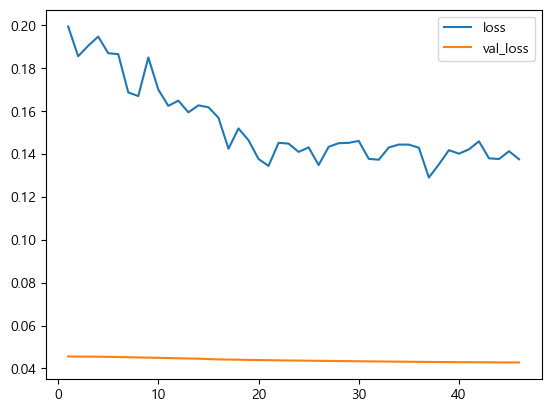

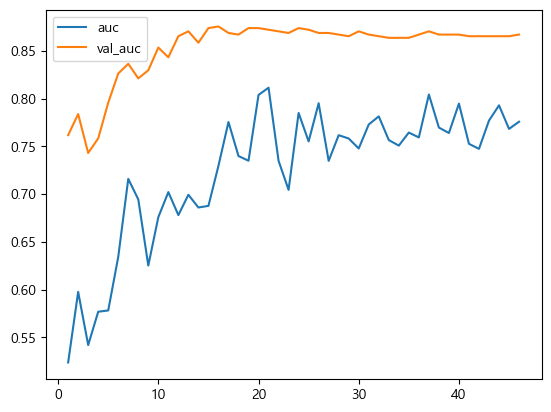

In [32]:
history_df = pd.DataFrame(history.history)
history_df.loc[1:, ['loss', 'val_loss']].plot()
history_df.loc[1:, ['auc', 'val_auc']].plot()

In [33]:
preds_eval = []
for model in models:
    preds_eval.append(model.predict(x))
    
print(classification_report(y, np.round(np.average(np.array(preds_eval),axis=0))))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60       494
           1       0.18      1.00      0.31        64

    accuracy                           0.49       558
   macro avg       0.59      0.71      0.46       558
weighted avg       0.91      0.49      0.57       558



In [34]:
preds =[]

preds.append(model.predict(test_csv))
pred = np.average(np.array(preds),axis=0)

pred

# 15-3 경로와 파일명 지정
submission = pd.read_csv(path +"sample_submission.csv",index_col="id")
submission['Attrition'] = pred
# 임계값을 0 으로 변경
# submission['Attrition'] = np.where(submission['Attrition'] > 0.5, 1 , 0)


submission.to_csv(path+"submission_5.csv")

submission['Attrition'][:20]

C:\Users\bitcamp\AppData\Local\Temp\ipykernel_16632\271707812.py:17: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  submission['Attrition'][:20]


id
1677    0.491918
1678    0.509410
1679    0.481037
1680    0.505840
1681    0.507335
1682    0.508883
1683    0.502280
1684    0.535075
1685    0.520643
1686    0.516293
1687    0.485617
1688    0.527509
1689    0.506338
1690    0.559415
1691    0.507715
1692    0.494430
1693    0.551627
1694    0.495071
1695    0.523460
1696    0.517861
Name: Attrition, dtype: float32